In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.linear_model import ElasticNet
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score, make_scorer

pd.set_option('display.max_columns',200)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
PATH = '/content/drive/MyDrive/seoul/For_modeling.csv'

In [ ]:
data = pd.read_csv(PATH)

In [ ]:
data.head()

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,1,24,7670,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,2,8,1390,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,3,8,1820,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,4,850,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 26 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int64  
 1   Duration    int64  
 2   Distance    int64  
 3   PLong       float64
 4   PLatd       float64
 5   DLong       float64
 6   DLatd       float64
 7   Haversine   float64
 8   Pmonth      int64  
 9   Pday        int64  
 10  Phour       int64  
 11  Pmin        int64  
 12  PDweek      int64  
 13  Dmonth      int64  
 14  Dday        int64  
 15  Dhour       int64  
 16  Dmin        int64  
 17  DDweek      int64  
 18  Temp        float64
 19  Precip      float64
 20  Wind        float64
 21  Humid       float64
 22  Solar       float64
 23  Snow        float64
 24  GroundTemp  float64
 25  Dust        float64
dtypes: float64(13), int64(13)
memory usage: 1.9 GB


In [ ]:
data['Snow'].dtype

dtype('float64')

In [ ]:
def convert_datatypes(df):
  dic = {'int64':'int8',
         'float64':'float32'}
  for col in df.columns:
        col_dtype = str(df[col].dtype)
        if col_dtype in dic:
            df[col] = df[col].astype(dic[col_dtype])
  return df

In [ ]:
data = convert_datatypes(data)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9601139 entries, 0 to 9601138
Data columns (total 26 columns):
 #   Column      Dtype  
---  ------      -----  
 0   Unnamed: 0  int8   
 1   Duration    int8   
 2   Distance    int8   
 3   PLong       float32
 4   PLatd       float32
 5   DLong       float32
 6   DLatd       float32
 7   Haversine   float32
 8   Pmonth      int8   
 9   Pday        int8   
 10  Phour       int8   
 11  Pmin        int8   
 12  PDweek      int8   
 13  Dmonth      int8   
 14  Dday        int8   
 15  Dhour       int8   
 16  Dmin        int8   
 17  DDweek      int8   
 18  Temp        float32
 19  Precip      float32
 20  Wind        float32
 21  Humid       float32
 22  Solar       float32
 23  Snow        float32
 24  GroundTemp  float32
 25  Dust        float32
dtypes: float32(13), int8(13)
memory usage: 595.2 MB


In [ ]:
data.head(5)

,Unnamed: 0,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,1,24,-10,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,2,8,110,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,3,8,28,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,4,82,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [ ]:
data = data.drop(['Unnamed: 0'], axis=1)

In [ ]:
data.head(5)

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,37.544666,126.888359,37.544666,126.888359,0.000000,1,1,0,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
1,24,-10,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,8,110,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,8,28,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,82,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [ ]:
data.shape

(9601139, 25)

In [ ]:
data.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,...,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06,9.601139e+06
mean,2.580294e+01,-9.069010e-01,3.754760e+01,1.269907e+02,3.754772e+01,1.269906e+02,1.870316e+00,7.578754e+00,1.576714e+01,1.437801e+01,...,2.999278e+01,2.945771e+00,1.856202e+01,1.784856e-02,1.819273e+00,5.397564e+01,7.300675e-01,9.948924e-03,2.072377e+01,3.245798e+01
std,2.504333e+01,7.404757e+01,4.441376e-02,8.257065e-02,4.445305e-02,8.323726e-02,1.995361e+00,2.696797e+00,8.748012e+00,6.249244e+00,...,1.730960e+01,1.977624e+00,9.498075e+00,3.736281e-01,9.710258e-01,1.742159e+01,9.175004e-01,1.628091e-01,1.265221e+01,2.407264e+01
min,1.000000e+00,-1.280000e+02,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,8.000000e+00,-6.600000e+01,3.751424e+01,1.269200e+02,3.751424e+01,1.269194e+02,6.758669e-01,6.000000e+00,8.000000e+00,1.000000e+01,...,1.500000e+01,1.000000e+00,1.220000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.160000e+01,1.600000e+01
50%,1.600000e+01,0.000000e+00,3.754693e+01,1.269943e+02,3.754655e+01,1.269947e+02,1.257498e+00,8.000000e+00,1.600000e+01,1.600000e+01,...,3.000000e+01,3.000000e+00,2.010000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.700000e-01,0.000000e+00,2.110000e+01,2.700000e+01
75%,3.600000e+01,6.400000e+01,3.757324e+01,1.270618e+02,3.757324e+01,1.270624e+02,2.363812e+00,1.000000e+01,2.300000e+01,1.900000e+01,...,4.500000e+01,5.000000e+00,2.550000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.260000e+00,0.000000e+00,2.850000e+01,4.200000e+01
max,1.190000e+02,1.260000e+02,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,...,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


In [ ]:
# data points having Haversine is 0
# data points having distance is -ve

In [ ]:
data[data['Haversine'] == 0].shape

(955083, 25)

In [ ]:
data[data['Haversine'] == 0].head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
0,3,50,37.544666,126.888359,37.544666,126.888359,0.0,1,1,0,...,4,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
26,18,64,37.556610,126.898018,37.556610,126.898018,0.0,1,1,0,...,27,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
139,2,10,37.575970,126.983063,37.575970,126.983063,0.0,1,1,0,...,40,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
159,43,-108,37.548222,127.067879,37.548222,127.067879,0.0,1,1,0,...,26,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
206,13,-22,37.609566,126.930977,37.609566,126.930977,0.0,1,1,0,...,5,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [ ]:
count = 0
for values in data[data['Haversine'] == 0][['PLong','DLong','PLatd','DLatd']].values:
  if values[0]!=values[1] or values[2]!= values[3]:
    print(values)
    count += 1
print(count)

0


In [ ]:
data = data[data['Haversine'] != 0]

In [ ]:
data.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
1,24,-10,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,8,110,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,8,28,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,82,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
5,8,8,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [ ]:
print(len(data))

8646056


In [ ]:
data[data['Distance']< 0].shape

(4319967, 25)

In [ ]:
data[data['Distance']< 0].head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
1,24,-10,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
6,25,-94,37.593288,127.036667,37.582500,126.998535,3.567644,1,1,0,...,27,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
8,3,-74,37.459953,127.024742,37.455799,127.016289,0.877524,1,1,0,...,5,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
10,27,-114,37.570721,126.898979,37.578072,126.930817,2.922488,1,1,0,...,30,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
11,23,-44,37.570721,126.898979,37.578072,126.930817,2.922488,1,1,0,...,30,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [ ]:
data['Distance'] = data['Distance'].apply(lambda x: abs(x))

In [ ]:
data[data['Distance']<0].shape

(0, 25)

Exploring the data points where distance is 0

In [ ]:
data.shape

(8646056, 25)

In [ ]:
data[data['Distance'] == 0].shape

(62196, 25)

In [ ]:
data = data[data['Distance'] != 0]

In [ ]:
data[data['Distance'] == 0].shape

(0, 25)

In [ ]:
data.shape

(8583860, 25)

In [ ]:
data.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,...,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06
mean,2.312955e+01,6.469965e+01,3.754775e+01,1.269909e+02,3.754784e+01,1.269907e+02,2.075792e+00,7.602144e+00,1.578074e+01,1.423189e+01,...,3.003426e+01,2.918544e+00,1.836986e+01,1.813653e-02,1.806258e+00,5.428974e+01,7.116835e-01,1.021077e-02,2.043900e+01,3.247711e+01
std,2.286273e+01,3.668851e+01,4.430957e-02,8.236325e-02,4.435278e-02,8.310413e-02,1.997906e+00,2.711003e+00,8.746162e+00,6.334664e+00,...,1.730503e+01,1.965265e+00,9.589536e+00,3.800511e-01,9.711913e-01,1.743543e+01,9.070674e-01,1.648297e-01,1.270957e+01,2.412983e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,2.088959e-02,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,7.000000e+00,3.200000e+01,3.751424e+01,1.269201e+02,3.751424e+01,1.269196e+02,8.264499e-01,6.000000e+00,8.000000e+00,9.000000e+00,...,1.500000e+01,1.000000e+00,1.200000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.120000e+01,1.600000e+01
50%,1.400000e+01,6.400000e+01,3.754769e+01,1.269943e+02,3.754707e+01,1.269943e+02,1.404485e+00,8.000000e+00,1.600000e+01,1.600000e+01,...,3.000000e+01,3.000000e+00,1.990000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.500000e-01,0.000000e+00,2.090000e+01,2.700000e+01
75%,3.100000e+01,9.600000e+01,3.757324e+01,1.270618e+02,3.757328e+01,1.270624e+02,2.554889e+00,1.000000e+01,2.300000e+01,1.900000e+01,...,4.500000e+01,5.000000e+00,2.540000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.230000e+00,0.000000e+00,2.840000e+01,4.200000e+01
max,1.190000e+02,1.280000e+02,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,...,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


In [ ]:
temp = data['Pmonth'].value_counts()
print(temp.values)
print(temp.index)
temp

[1220276 1207581  982218  933276  875010  856022  796776  576777  453142
  392177  146360  144245]
Index([10, 9, 6, 7, 8, 11, 5, 4, 12, 3, 2, 1], dtype='int8', name='Pmonth')


Pmonth
10    1220276
9     1207581
6      982218
7      933276
8      875010
11     856022
5      796776
4      576777
12     453142
3      392177
2      146360
1      144245
Name: count, dtype: int64

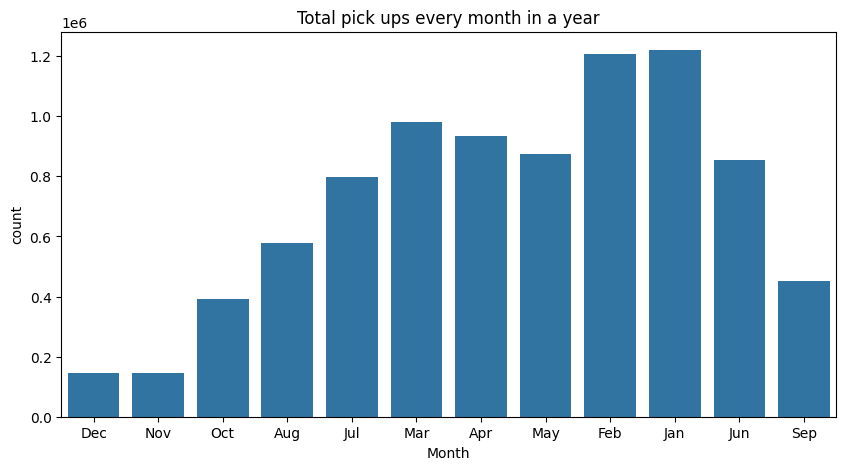

In [ ]:
temp = data['Pmonth'].value_counts()
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pick_up_months = temp.index
trips_count = temp.values
plt.figure(figsize=(10,5))
sns.barplot(x=pick_up_months, y=trips_count)
plt.title('Total pick ups every month in a year')
plt.xlabel('Month')
plt.ylabel('count')
plt.xticks(pick_up_months-1,month_labels)
plt.show()


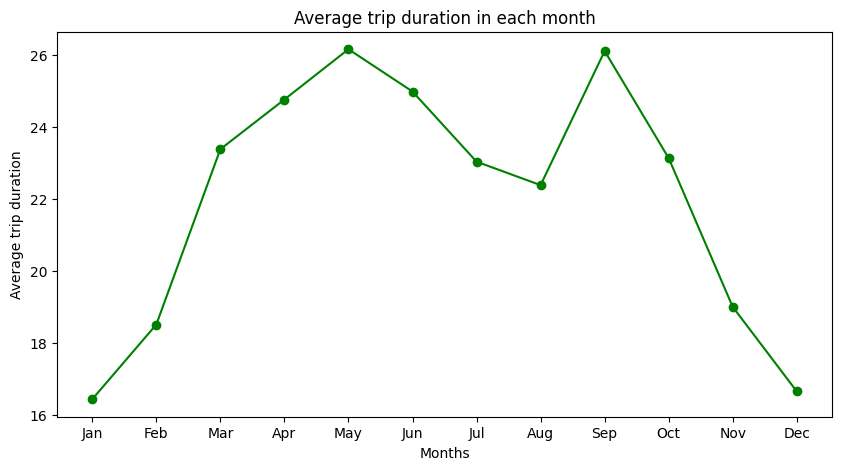

In [ ]:
temp = data.groupby('Pmonth')['Duration'].mean()
month_labels = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
pick_up_months = temp.index
plt.figure(figsize=(10,5))
plt.plot(pick_up_months, temp.values,'g-o')
plt.title('Average trip duration in each month')
plt.xlabel('Months')
plt.ylabel('Average trip duration')
plt.xticks(pick_up_months,month_labels)
plt.show()

In [ ]:
temp = data.groupby("PDweek")["Duration"].mean()
print(temp.values)
print(temp.index)

[21.9432908  21.9106842  21.99302029 21.0932298  21.90266917 26.81777188
 27.1057445 ]
Index([0, 1, 2, 3, 4, 5, 6], dtype='int8', name='PDweek')


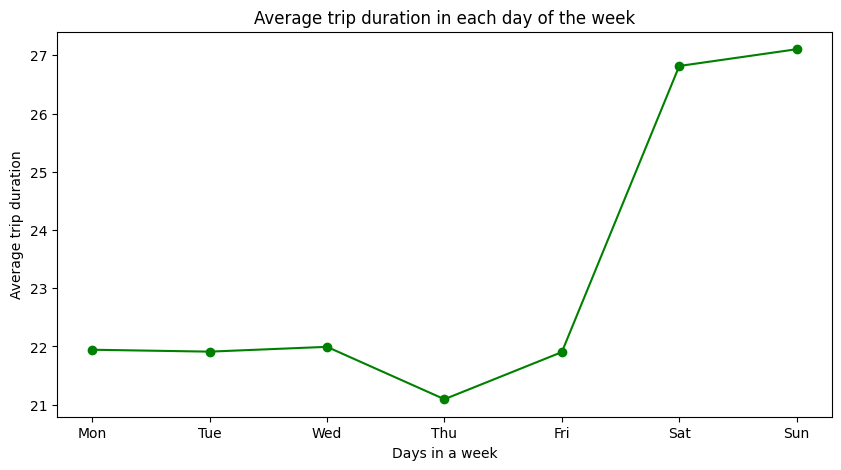

In [ ]:
temp = data.groupby("PDweek")["Duration"].mean()
week_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
pick_up_week = temp.index
plt.figure(figsize=(10,5))
plt.plot(temp.index, temp.values,'g-o')
plt.title('Average trip duration in each day of the week')
plt.xlabel('Days in a week')
plt.ylabel('Average trip duration')
plt.xticks(pick_up_week,week_labels)
plt.show()

In [ ]:
temp = data.groupby("Pday")["Duration"].mean()
print(temp.values)
print(temp.index)

[22.94941643 23.34131899 24.7094529  23.37891484 22.75141667 23.08019609
 24.92659974 24.79216174 24.32636707 22.35692834 21.72464234 21.88012806
 23.49967862 22.95696189 22.86001396 22.27755409 23.085857   22.53567661
 22.88226983 22.70641318 24.03656897 22.61437511 22.17151095 23.23217187
 24.66416107 23.69196416 22.51976843 21.98413248 23.61739519 22.53738635
 22.50089334]
Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
      dtype='int8', name='Pday')


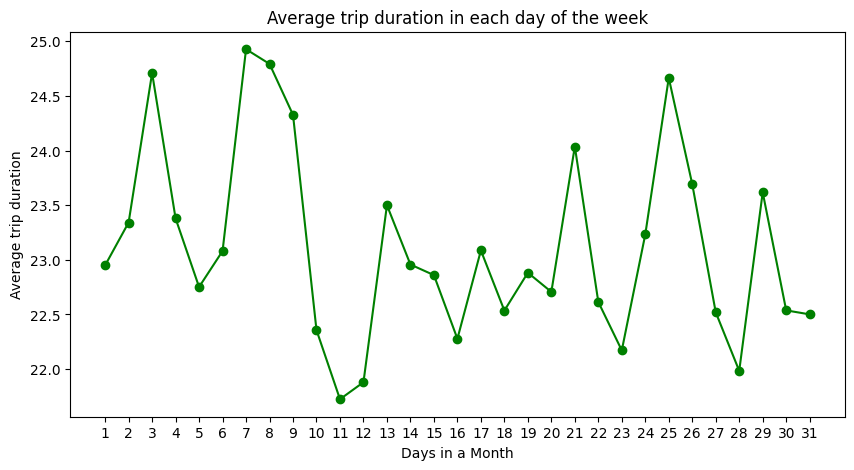

In [ ]:
temp = data.groupby("Pday")["Duration"].mean()
plt.figure(figsize=(10,5))
plt.plot(temp.index, temp.values,'g-o')
plt.title('Average trip duration in each day of the week')
plt.xlabel('Days in a Month')
plt.ylabel('Average trip duration')
plt.xticks(ticks = range(1,32))
plt.show()

In [ ]:
temp = data.groupby("Phour")["Duration"].mean()
print(temp.values)
print(temp.index)

[20.09747328 20.07220078 19.7697334  19.95072581 18.76996762 17.4583931
 16.31803423 15.63618454 13.54416294 16.01784511 19.52449565 21.25517894
 21.99570575 24.1404524  26.68575607 28.14919209 28.10695834 26.43193269
 25.54356612 26.30733905 27.34162905 26.14303829 23.34078878 21.0254713 ]
Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int8', name='Phour')


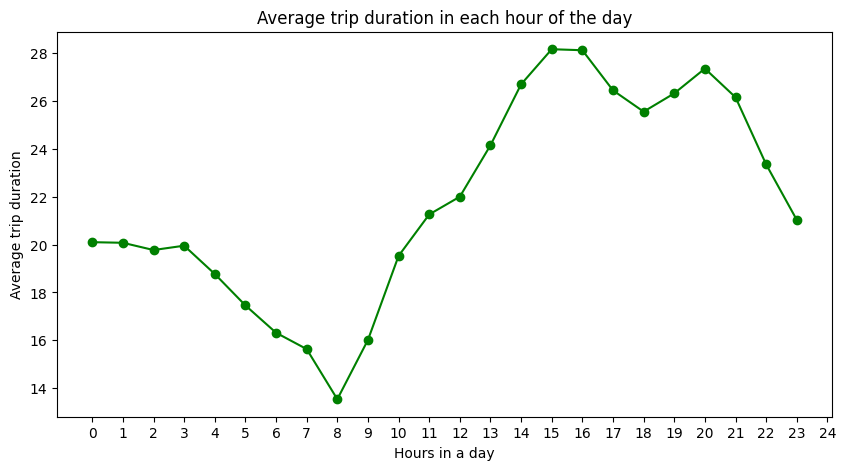

In [ ]:
temp = data.groupby("Phour")["Duration"].mean()
plt.figure(figsize=(10,5))
plt.plot(temp.index, temp.values,'g-o')
plt.xticks(ticks = range(0,25))
plt.title('Average trip duration in each hour of the day')
plt.xlabel('Hours in a day')
plt.ylabel('Average trip duration')
plt.show()

In [ ]:
data.shape

(8583860, 25)

In [ ]:
data['Humid'].nunique()

89

In [ ]:
data.head()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
1,24,10,37.506199,127.003944,37.551250,127.035103,5.713529,1,1,0,...,25,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
2,8,110,37.544590,127.057083,37.537014,127.061096,0.913702,1,1,0,...,9,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
3,8,28,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
4,4,82,37.573242,127.015907,37.565849,127.016403,0.823227,1,1,0,...,6,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0
5,8,8,37.571102,127.023560,37.561447,127.034920,1.468027,1,1,0,...,10,0,-3.2,0.0,0.5,40.0,0.0,0.0,-2.2,25.0


In [ ]:
continous_data_columns = [column for column in data.columns if data[column].nunique()>40]
categorical_data_columns = [column for column in data.columns if column not in continous_data_columns]
print('continous_data_columns:',continous_data_columns)
print('categorical_data_columns:',categorical_data_columns)

continous_data_columns: ['Duration', 'Distance', 'PLong', 'PLatd', 'DLong', 'DLatd', 'Haversine', 'Pmin', 'Dmin', 'Temp', 'Precip', 'Wind', 'Humid', 'Solar', 'Snow', 'GroundTemp', 'Dust']
categorical_data_columns: ['Pmonth', 'Pday', 'Phour', 'PDweek', 'Dmonth', 'Dday', 'Dhour', 'DDweek']


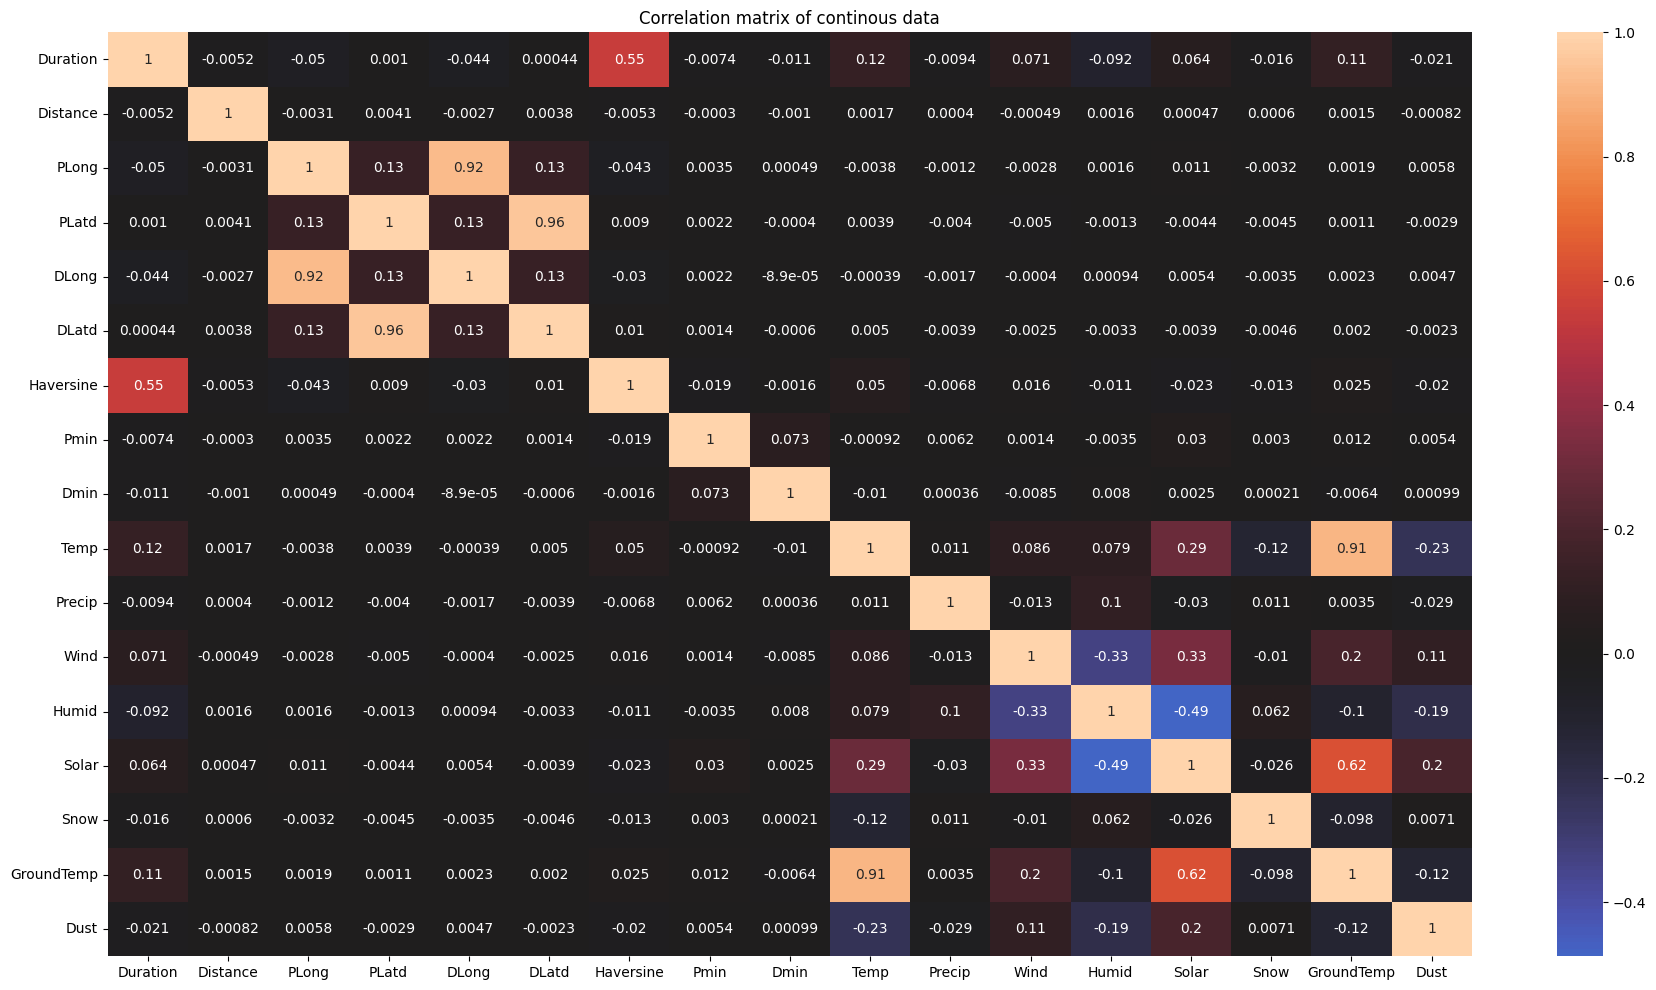

In [ ]:
plt.figure(figsize=(22,12))
sns.heatmap(data[continous_data_columns].corr(),annot=True,center = 0)
plt.title('Correlation matrix of continous data')
plt.show()

In [ ]:
data.describe()

,Duration,Distance,PLong,PLatd,DLong,DLatd,Haversine,Pmonth,Pday,Phour,...,Dmin,DDweek,Temp,Precip,Wind,Humid,Solar,Snow,GroundTemp,Dust
count,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,...,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06,8.583860e+06
mean,2.312955e+01,6.469965e+01,3.754775e+01,1.269909e+02,3.754784e+01,1.269907e+02,2.075792e+00,7.602144e+00,1.578074e+01,1.423189e+01,...,3.003426e+01,2.918544e+00,1.836986e+01,1.813653e-02,1.806258e+00,5.428974e+01,7.116835e-01,1.021077e-02,2.043900e+01,3.247711e+01
std,2.286273e+01,3.668851e+01,4.430957e-02,8.236325e-02,4.435278e-02,8.310413e-02,1.997906e+00,2.711003e+00,8.746162e+00,6.334664e+00,...,1.730503e+01,1.965265e+00,9.589536e+00,3.800511e-01,9.711913e-01,1.743543e+01,9.070674e-01,1.648297e-01,1.270957e+01,2.412983e+01
min,1.000000e+00,1.000000e+00,3.743727e+01,1.267986e+02,3.743727e+01,1.267986e+02,2.088959e-02,1.000000e+00,1.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,-1.780000e+01,0.000000e+00,0.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,-1.360000e+01,0.000000e+00
25%,7.000000e+00,3.200000e+01,3.751424e+01,1.269201e+02,3.751424e+01,1.269196e+02,8.264499e-01,6.000000e+00,8.000000e+00,9.000000e+00,...,1.500000e+01,1.000000e+00,1.200000e+01,0.000000e+00,1.100000e+00,4.100000e+01,0.000000e+00,0.000000e+00,1.120000e+01,1.600000e+01
50%,1.400000e+01,6.400000e+01,3.754769e+01,1.269943e+02,3.754707e+01,1.269943e+02,1.404485e+00,8.000000e+00,1.600000e+01,1.600000e+01,...,3.000000e+01,3.000000e+00,1.990000e+01,0.000000e+00,1.700000e+00,5.300000e+01,2.500000e-01,0.000000e+00,2.090000e+01,2.700000e+01
75%,3.100000e+01,9.600000e+01,3.757324e+01,1.270618e+02,3.757328e+01,1.270624e+02,2.554889e+00,1.000000e+01,2.300000e+01,1.900000e+01,...,4.500000e+01,5.000000e+00,2.540000e+01,0.000000e+00,2.400000e+00,6.700000e+01,1.230000e+00,0.000000e+00,2.840000e+01,4.200000e+01
max,1.190000e+02,1.280000e+02,3.768972e+01,1.271803e+02,3.768972e+01,1.271803e+02,2.863448e+01,1.200000e+01,3.100000e+01,2.300000e+01,...,5.900000e+01,6.000000e+00,3.940000e+01,3.500000e+01,7.400000e+00,9.800000e+01,3.520000e+00,8.800000e+00,6.220000e+01,3.040000e+02


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(['Duration'],axis=1),data['Duration'],test_size=0.25,random_state=42)
print(X_train.shape,y_train.shape)
print(y_train.shape,y_test.shape)


(6437895, 24) (6437895,)
(6437895,) (2145965,)


In [ ]:
def rmse(y_true,predictions):
  return np.sqrt(mean_squared_error(y_true,predictions))

def get_matrics(y_true,predictions):
  rmse_score = rmse(y_true,predictions)
  print('RMSE:',rmse_score)
  mae_score = mean_absolute_error(y_true,predictions)
  print('MAE:',mae_score)
  mse_score = mean_squared_error(y_true,predictions)
  print('MSE:',mse_score)
  r2_score_score = r2_score(y_true,predictions)
  print('R2_score:',r2_score_score)

In [ ]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [ ]:
def convert_datatypes(df):
  dic = {'int64':'int8',
         'float64':'float32'}
  for col in df.columns:
        col_dtype = str(df[col].dtype)
        if col_dtype in dic:
            df[col] = df[col].astype(dic[col_dtype])
  return df

In [ ]:
data = convert_datatypes(data)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data.drop(['Duration'],axis=1),data['Duration'],test_size=0.25,random_state=42)
print(X_train.shape,y_train.shape)
print(y_train.shape,y_test.shape)

(6437895, 24) (6437895,)
(6437895,) (2145965,)


# **Linear Regression**

In [ ]:
linear_reg_model = LinearRegression()
linear_reg_model.fit(scaled_X_train,y_train)

LinearRegression()

In [ ]:
preds = linear_reg_model.predict(scaled_X_test)
get_matrics(y_test,preds)

RMSE: 18.691484
MAE: 12.119319
MSE: 349.3716
R2_score: 0.3324286160638985


In [ ]:
preds = linear_reg_model.predict(scaled_X_train)
get_matrics(y_train,preds)

RMSE: 18.686516
MAE: 12.114566
MSE: 349.18588
R2_score: 0.33168885423822736


# **Elastic Net**

In [ ]:
elasticnet_model = ElasticNet()

In [ ]:
elasticnet_param_grid = {
    'alpha': [0.01, 0.1, 1, 10, 100],
    'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]
}


In [ ]:
rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [ ]:
elasticnet_grid_search = GridSearchCV(estimator=elasticnet_model, param_grid=elasticnet_param_grid,
                                      scoring=rmse_scorer, cv=5, verbose=1, n_jobs=-1)

In [ ]:
elasticnet_grid_search.fit(scaled_X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0.01, 0.1, 1, 10, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 1.0]},
             scoring=make_scorer(rmse, greater_is_better=False), verbose=1)

In [ ]:
elasticnet_best_params = elasticnet_grid_search.best_params_
elasticnet_best_rmse = -elasticnet_grid_search.best_score_
print(f"ElasticNet Best parameters: {elasticnet_best_params}")
print(f"ElasticNet Best score (RMSE): {elasticnet_best_rmse}")

ElasticNet Best parameters: {'alpha': 0.01, 'l1_ratio': 1.0}
ElasticNet Best score (RMSE): 18.689955520629884


In [ ]:
elasticnet_best_model = elasticnet_grid_search.best_estimator_
y_val_pred_elasticnet = elasticnet_best_model.predict(scaled_X_test)

In [ ]:
get_matrics(y_test,y_val_pred_elasticnet)

RMSE: 18.694904
MAE: 12.121204
MSE: 349.49945
R2_score: 0.33218461784335507


In [ ]:
preds = elasticnet_best_model.predict(scaled_X_train)
get_matrics(y_train,preds)

RMSE: 18.689898
MAE: 12.116259
MSE: 349.3123
R2_score: 0.3314472657110499


# **XG Boost**

In [ ]:
xgb_model = XGBRegressor(random_state = 24)
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=24, ...)

In [ ]:
preds = xgb_model.predict(X_test)
get_matrics(y_test,preds)

RMSE: 5.048783571082986
MAE: 2.730921742283728
MSE: 25.490215547637465
R2_score: 0.951293883557708


In [ ]:
preds = xgb_model.predict(X_train)
get_matrics(y_train,preds)

RMSE: 5.025169224708992
MAE: 2.722833200031402
MSE: 25.25232573696237
R2_score: 0.9516692844103076


### **Cross Validation**

In [ ]:
np.mean(cross_val_score(xgb_model,X_train,y_train,cv=5,scoring='neg_mean_squared_error'))

-26.22049922481609

In [ ]:
rmse_scorer = make_scorer(rmse, greater_is_better=False)

In [ ]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

scoring = {
    'RMSE': rmse_scorer,
    'MAE': 'neg_mean_absolute_error',
    'MSE': 'neg_mean_squared_error',
    'R2': 'r2'
}
# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring=scoring , refit = 'RMSE', cv=5, verbose=1, n_jobs=-1)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score (MSE): {best_score}")



Fitting 5 folds for each of 243 candidates, totalling 1215 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best score (MSE): -3.5668659019708238


In [ ]:
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best parameters: {best_params}")
print(f"Best score (MSE): {best_score}")

Best parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Best score (MSE): -3.5668659019708238


In [ ]:
print(grid_search.best_estimator_)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=1.0, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=7, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=200, n_jobs=None,
             num_parallel_tree=None, random_state=24, ...)


In [ ]:
best_model = grid_search.best_estimator_
preds = best_model.predict(X_test)


In [ ]:
get_matrics(y_test,preds)

RMSE: 3.6220196813398826
MAE: 1.8860771335912239
MSE: 13.119026572013464
R2_score: 0.9749324663562826


In [ ]:
preds = best_model.predict(X_train)
get_matrics(y_train,preds)

RMSE: 3.549392369686577
MAE: 1.8698271098430583
MSE: 12.598186193989296
R2_score: 0.9758881870830434
